Project Proposal:

1.	I am interested in the atmospheric sciences and time series data. I would like to use data on date and intensity of hurricanes to predict future trends in hurricane number and intensity. The tool I would like to use is the fbProphet python package, created specifically for time series data. (https://facebook.github.io/prophet/)
2.	The predictability of hurricanes is important economically in the ability to better prepare buildings, budgets, and people for climate change. This project would be interesting because it would be coming at it from a statistical point of view rather than a physical simulation point of view.
3.	There are several questions:
a.	I try and answer if it is possible to replicate past years data on hurricane formation dates and intensity.
b.	I try and show a prediction for future years of hurricane formation and intensity.
4.	The data on intensity and date is publicly accessible NOAA data. (https://www.nhc.noaa.gov/data/)
5.	Date of formation (or landfall) and intensity
6.	Past years data on formation and intensity. The package Prophet uses a simple input and output to predict future trends. It would be interesting to compare to more robust, physical models.
7.	Summary statistics, scatter plot, chi-squared, 95% confidence interval. 



In [4]:
#Imports
import csv #to read a csv
import pandas as pd #for dataframes
import matplotlib.pyplot as plt #for ploting
import numpy as np #for arrays
import plotly.express as px #interactive plots
from fbprophet import Prophet #timeseries data package from facebook
from datetime import datetime #to change dates in csv to usable date in Prophet
import math #math functions
from fbprophet.plot import plot_plotly #interactive plots
import plotly.offline as py #interactive plots
from sklearn.metrics import r2_score

# 1. Data exploration

In [5]:
#read the csv into a pandas dataframe
df = pd.read_csv('hurdat2-1851-2018-120319.csv', low_memory=False)
df.info()

FileNotFoundError: [Errno 2] File hurdat2-1851-2018-120319.csv does not exist: 'hurdat2-1851-2018-120319.csv'

The data set has 53219 timestamps - which are NOT all individual hurricanes. The dataset follows each hurricane from formation to dissipation in (usually) 6 hour time intervals.

This data set is from NOAA Hurricane Database (hurdat) and can be retrieved at: https://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html under number 1 "HURDAT 2", along with format descriptions.

In [6]:
df.head(19)


NameError: name 'df' is not defined

The above table shows the first few lines of the data set. This particular output shows 3 storms. All 3 are "UNNAMED" because they occured in 1851, before storm naming conventions were added.

# 2. Methods, Background, and Documentation

Explanation of useful columns:
    - TimeStamp: This column contains both timestamps and information when a new hurricane tracking is begun. If the entry starts with a letter then it is declaring a new hurricane. If it does not have a letter then it is a date in yyyymmdd format.
    - Name: This column contains the name of the hurricane (or 'unnamed' if it is unnamed) adjacent to the hurricane declaration. Adjacent to each successive timestamp is hours in universal time coordinates (UTC)
    - Points: This column contains the number of timestamps for the hurricane named immediately beside it to the left. If it is not a number then it is a letter giving information about what the hurricane did. For exampele:
        - C: Closest approach to a coast, not followed by a landfall 
        - G: Genesis I–An intensity peak in terms of both pressure and wind 
        - L: Landfall (center of system crossing a coastline) 
        - P: Minimum in central pressure 
        - R: Provides additional detail on the intensity of the cyclone when rapid changes are underway 
        - S: Change of status of the system T–Provides additional detail on the track (position) of the cyclone 
        - W: Maximum sustained wind speed
    - Type: This column signifies what type of storm it is at this timestamp. If it is in the same row as a new hurricane declaration then it is NAN. For example:
        - TD: Tropical Depression
        - TS: Tropical Storm
        - HU: Hurricane
    - Latitude: The latitude that the storm was at when the measurement was taken
    - Longitude: The longitude that the storm was at when the measurement was taken
    - MaxWind: The maximum sustained wind when the measurement was taken (in knots)
    - MinPressure: The minimum Pressure when the measurement ws taken (in millibars)
        

Hurricane Strength Categories:

1. 74-95mph, or 64-82kt
2. 96-110mph, or 83-95kt
3. (major) 111-129mph , or 96-112kt
4. (major) 130-156mph, or 113-136kt
5. (major) 157mph+, or 137kt


# 3. Data Formating

In [7]:
#Read the Data into useful arrays 
CountPerYear = [] #total number of hurricanes for each year that occurs in the data
Years = [] #each year that occurs in the data
totalStorms = 0 #an interesting statistic

#The following code misses the first year
firstYear = '1851'
Years.append(firstYear)

temp = 0 #keeps track of total storms per year when going through the loop
majorCount = 0 #keeps track of total major hurricanes per year 
majorNum = [] #an array of the number of major hurricanes per year
stormDate = [] #an array of the storm dates in original format
Date = [] #this is needed in yyyymmdd format for prophet and has the date of each hurricane formation

for i in range(0,len(df['Name'])):
    if df['Name'][i].isnumeric() == False: #then this is a new hurricane
        numOfPoints = df['Points'][i] #number of data points for this hurricane
        #get each wind value at each timestamp of each hurricane
        maxWindPoss = df['MaxWind'][i+1:i+int(numOfPoints)+1]
        #convert to list
        maxWindPoss = [int(i) for i in maxWindPoss]
        #find the maximum wind speed for each hurricane
        MAX = max(maxWindPoss)
        #convert from knots to MPH
        MAX *= 1.1508
        #assign major hurricane status
        if MAX >= 111: #111 mph is the definition of the weakest major hurricane
            #cat 3 or higher
            majorCount+= 1
        
        #get date information
        year = df['TimeStamp'][i][4:8]
        date = df['TimeStamp'][i+1]
        dtobj = datetime.strptime(date,'%Y%m%d')
        formatdate = dtobj.strftime('%Y-%m-%d')
        
        #this way the array of years only has years that are represented in the data
        if year not in Years: 
            Years.append(year)
            CountPerYear.append(temp)
            majorNum.append(majorCount)
            #reset major count and total count each year
            majorCount = 0
            temp = 0
        temp += 1
        stormDate.append(temp)
        Date.append(formatdate)
        totalStorms += 1
#saves the last data points        
CountPerYear.append(temp)
majorNum.append(majorCount)

NameError: name 'df' is not defined

# 4. Analysis

In [8]:
# I need these as integers
stormDate = [int(i) for i in stormDate]
Years = [int(i)for i in Years]
#interactive plots take a dataframe as an argument
toplot = pd.DataFrame()
toplot['Year'] = Years
toplot['Total Storms'] = CountPerYear
#plot the total number of storms in each year
fig = px.line(toplot, x = 'Year', y = 'Total Storms', title = "Total Number of Storms Each Year")
fig.update_layout(
    xaxis = dict(
        dtick = 25
    )
)
fig.show()

ValueError: Length of values does not match length of index

From Wiki: The 1969 Atlantic hurricane season was the most active Atlantic hurricane season since 1933 and is tied with 2019 as the fourth most active Atlantic hurricane season on record, and was also the final year of the most recent positive Atlantic multidecadal oscillation (AMO) era. The hurricane season officially began on June 1, and lasted until November 30. The season had the highest number of systems reach hurricane status – twelve – in a single season, until that record was surpassed in 2005. 

From NOAA: The AMO cycle swings between extended periods, typically lasting 20-40 years, of warm and cool phases in North Atlantic Ocean temperatures. The atmospheric conditions that make way for the AMO warm phase can create the perfect storm and heighten Atlantic hurricane activity and storm strength.


In [9]:
#plot number of major hurricanes
majorNum = [int(i) for i in majorNum]
toplot2 = pd.DataFrame()
toplot2['Year'] = Years
toplot2['Number of Major Hurricanes'] = majorNum
fig2 = px.line(toplot2, x = 'Year', y = 'Number of Major Hurricanes', title = 'Total Number of Major Hurricanes Each Year')
fig2.show()

ValueError: Length of values does not match length of index

Major hurricanes gives a better picture of overall climate than all storms combined.

In [10]:
#Years with most major hurricanes
top10 = toplot2.nlargest(10,'Number of Major Hurricanes')
print(top10.sort_values(by='Year', ascending = False))

KeyError: 'Number of Major Hurricanes'

The top 3 years all occur in the last 30 years. The next jump is 32 years, which shows that the record holding years are becoming more frequent.

In [11]:
#Years with least major hurricanes
bottom10 = toplot2.nsmallest(10, 'Number of Major Hurricanes')
print(bottom10.sort_values(by= "Year", ascending = False))

KeyError: 'Number of Major Hurricanes'

Notice all lowest number years were in the 1800s. This may be due to reporting issues. The technology for identifing storms in the 1800s was not as good as today's documenting procedures. NOAA has made an effort to revise and correct information for this time period. A rather long explanation for what was done can be found here: https://www.aoml.noaa.gov/hrd/hurdat/metadata_master.html Revisions for 1956 onward can be found here: https://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html under 2b and 2c.

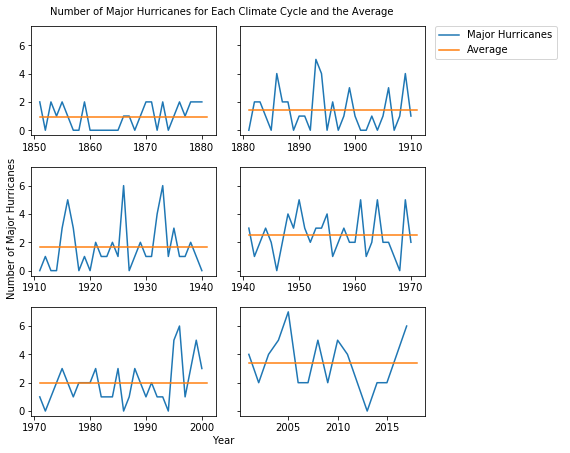

In [571]:
#Climate cycles are typically defined as 30 years.
#This plot shows the major hurricanes and the climate cycle
#average for the (almost) 6 climate cycles represented in the data 
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True, figsize=(6, 6))

ax[0,0].plot(Years[0:30],majorNum[0:30])
ax[0,0].plot([Years[0],Years[30]],[np.mean(majorNum[0:30]),np.mean(majorNum[0:30])])
ax[0,1].plot(Years[30:60],majorNum[30:60])
ax[0,1].plot([Years[30],Years[60]],[np.mean(majorNum[30:60]),np.mean(majorNum[30:60])])
ax[1,0].plot(Years[60:90],majorNum[60:90])
ax[1,0].plot([Years[60],Years[90]],[np.mean(majorNum[60:90]),np.mean(majorNum[60:90])])
ax[1,1].plot(Years[90:120],majorNum[90:120])
ax[1,1].plot([Years[90],Years[120]],[np.mean(majorNum[90:120]),np.mean(majorNum[90:120])])
ax[2,0].plot(Years[120:150],majorNum[120:150])
ax[2,0].plot([Years[120],Years[150]],[np.mean(majorNum[120:150]),np.mean(majorNum[120:150])])
ax[2,1].plot(Years[150:-1],majorNum[150:-1])
ax[2,1].plot([Years[150],Years[-1]],[np.mean(majorNum[150:-1]),np.mean(majorNum[150:-1])])

fig.legend(('Major Hurricanes', 'Average'), bbox_to_anchor = (1.3,1) )
fig.text(0.5, 0, 'Year', ha='center')
fig.text(0, 0.5, 'Number of Major Hurricanes', va='center', rotation='vertical')
fig.text(.1,1, "Number of Major Hurricanes for Each Climate Cycle and the Average", va = 'center')
fig.tight_layout()

In this graph the 6 plots show the 6 climate cycles represented in the data. The last graph on the bottom right is the climate cycle that is current. As such, the cycle is not 30 years long yet. The blue line is the number of major hurricanes each year and the orange line is the average for each graph. This average can be used to compare climate cycles to one another.

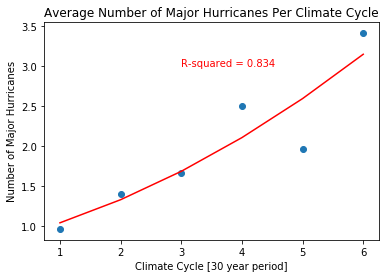

In [572]:
#average number of major hurricanes through climate cycles
plt.scatter(np.arange(1,numCycles+1),averages) #note the 6th climate cycle is not 30 years yet.
z = np.polyfit(np.arange(1,numCycles+1),averages, 2)
p = np.poly1d(z)
plt.plot(np.arange(1,numCycles+1), p(np.arange(1,numCycles+1)), 'r-')
plt.title("Average Number of Major Hurricanes Per Climate Cycle")
plt.xlabel('Climate Cycle [30 year period]')
plt.ylabel('Number of Major Hurricanes')
toprint = "R-squared = " + str(round(r2_score(averages, p(np.arange(1,numCycles+1))),3))
plt.text(3,3,toprint, color = 'red')
plt.show()


This graph shows the average number of major hurricanes for each climate cycle represented in the data above as well as a quadratic trend line.

In [581]:
#making a dataframe for Prophet
subdf = pd.DataFrame()
subdf['ds'] = Date
subdf['y'] = stormDate
subdf['Season'] = ""
#define a special seasonality for this data frame since huricane season is only part of the year
for i in range(len(subdf['ds'])):
    mydate = pd.to_datetime(subdf['ds'][i])
    if (mydate.month >= 6 and mydate.month <= 11):
        subdf.loc[i,'Season'] = 1 # one is assigned if this occurs in hurricane season
    else:
        subdf.loc[i,'Season'] = 0 # zero is assigned if this does not occur in hurricane season
subdf.head(10)

ds  y  Season
0  1851-06-25  1       1
1  1851-07-05  2       1
2  1851-07-10  3       1
3  1851-08-16  4       1
4  1851-09-13  5       1
5  1851-10-16  6       1
6  1852-08-19  1       1
7  1852-09-05  2       1
8  1852-09-09  3       1
9  1852-09-22  4       1

The ds column contains the date of formation of the storm and the y column is the number of the storm that year

In [575]:
m = Prophet(weekly_seasonality = False, daily_seasonality = False)
m.add_seasonality(name='weekly_on_season', period=12, fourier_order=3, condition_name='Season')
m.add_seasonality(name='weekly_off_season', period=12, fourier_order=3, condition_name='Season')
myfit = m.fit(subdf)

Since hurricane season (June 1st through November 30th) operates on a seasonality scale that is not weekly or monthly, I can set my own seasonality in prophet.

In [576]:
future = m.make_future_dataframe(periods = 10000) #number of forcast periods can be changed to show shorter or longer forcasts
future['y'] = ""
future['Season'] = ""
#this bit defines a 3rd column of boolean values that indicates wether each date is durring 
#the on season or off season
for i in range(len(future['ds'])):
    mydate = pd.to_datetime(future['ds'][i])
    if (mydate.month >= 6 and mydate.month <= 11):
        future.loc[i,'Season'] = 1 # one is assigned if this occurs in hurricane season
    else:
        future.loc[i,'Season'] = 0 # zero is assigned if this does not occur in hurricane season

In [577]:
future.tail() #shows how long the forcast goes out to 

ds y  Season
11868 2046-03-09         0
11869 2046-03-10         0
11870 2046-03-11         0
11871 2046-03-12         0
11872 2046-03-13         0

In [578]:
forecast = myfit.predict(future) #fills out the forcast table
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
11868 2046-03-09  6.254967    1.989460   10.452705
11869 2046-03-10  6.684040    2.473423   10.506703
11870 2046-03-11  7.088855    3.208781   11.339552
11871 2046-03-12  7.460481    3.398272   11.661385
11872 2046-03-13  7.790683    3.779372   11.960704

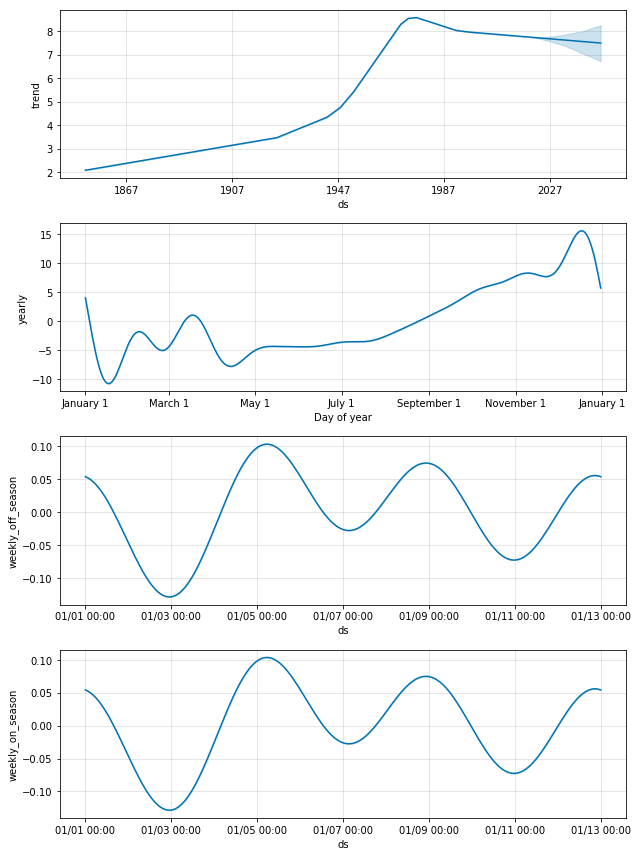

In [579]:
#These are part of the time series components for Prophet
fig2 = m.plot_components(forecast)

The above cell shows (in order of appearance) the overall trend in storm numbers, the yearly trends and the daily trends for off season (not hurricane season) and on season (hurricane season). 

- The overall trend shows a sharp increase around 1970 and the confidence interval for the forcast.
- The yearly trend shows when storms typically occur durring a calendar year.
- The weekly trends shows what day of the week storms are typically formed.

The other thing to note is that it appears that most of the storms in the database are in the northern hemisphere. Otherwise, the yearly trend would be bi-modal.

In [583]:
py.init_notebook_mode()
fig3 = plot_plotly(m, forecast)
py.iplot(fig3)
#the blue line is the predictions, and the dots are actual values

This graph shows the total storms per year (black dots)and the trendline (blue). The blue trendline continues into the future using the FBProphet forcast. 

# 5. Results

# 6. Conclusions